In [25]:
import pandas as pd
import numpy as np
from decimal import Decimal as Dec
import matplotlib.pyplot as plt
import sympy

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [26]:
df = pd.read_csv("LINK_WETH_3000_0815.csv")

In [27]:
df.tail(50)

,Unnamed: 0,timeStamp,blockNumber,transactionIndex,transactionHash,from,to,gasPrice,gasUsed,transactionCost,type,status,token0Address,token1Address,tickSpacing,feeTier,token0Decimal,token1Decimal,sender,owner,recipient,tickLower,tickUpper,amount0,amount1,liquidity,amount0_delta,amount1_delta,liquidity_delta,amount0_collected,amount1_collected,amount0_flashed,amount1_flashed,paid0,paid1,sqrtPriceX96,tick,event_name,dt,p_current,p_real,wealth,cum_wealth,cum_liquidity
38634,38634,2021-08-12 10:31:35,13009821,273,0x65793269c38f81e18f6b7b4c48d7adc547433017e4db...,0x14D8EaF4d58F78910DA47fc2534489cc9D1EAeE9,0x0000000089341e263B85D84A0Eea39f47C37A9d2,35000000000,466085,0.016313,0x2,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,0x0000000089341e263B85D84A0Eea39f47C37A9d2,NaN,NaN,NaN,NaN,439135513717761217913496,1243.368010,-10.130179,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,7161191952704053475916389915,-48076.0,Swap,1588.0,-48075.511254,0.008170,0.0,NaN,NaN
38635,38635,2021-08-12 10:52:26,13009924,16,0xcd2e73d62e2ce602d0fea6eb66d49b4fa5880d34bba9...,0xC4A675c5041e9687768CE154554D6cdDd2540712,0xa57Bd00134B2850B2a1c55860c9e9ea100fDd6CF,36676668225,215216,0.007893,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,0x56178a0d5F301bAf6CF3e1Cd53d9863437345Bf9,NaN,NaN,NaN,NaN,439135513717761217913496,1727.537873,-14.066313,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,7158654129954715148302584606,-48083.0,Swap,1251.0,-48082.600576,0.008164,0.0,NaN,NaN
38636,38636,2021-08-12 10:53:19,13009929,84,0xe092f3e9d22e4458227747419e7f7f7fc6656d8aac74...,0x5D981f1fe758721741e6a26CC05c10458ed10A30,0xa57Bd00134B2850B2a1c55860c9e9ea100fDd6CF,35596833519,214186,0.007624,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,0x56178a0d5F301bAf6CF3e1Cd53d9863437345Bf9,NaN,NaN,NaN,NaN,439135513717761217913496,1635.323629,-13.306284,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,7156253430365685955464985284,-48090.0,Swap,53.0,-48089.309161,0.008159,0.0,NaN,NaN
38637,38637,2021-08-12 10:55:01,13009934,5,0xf0dff086b567e35d4a2c3b8d889015596bb1dd902401...,0x0F4ee9631f4be0a63756515141281A3E2B293Bbe,0xE592427A0AEce92De3Edee1F18E0157C05861564,101293698849,114138,0.011561,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,0x0F4ee9631f4be0a63756515141281A3E2B293Bbe,NaN,NaN,NaN,NaN,439135513717761217913496,396.149000,-3.222038,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,7155672115107609284370510130,-48091.0,Swap,102.0,-48090.933944,0.008157,0.0,NaN,NaN
38638,38638,2021-08-12 10:55:01,13009934,49,0x20cf3e1391e552e32c6b354bd2d0f4a953e93403f662...,0xb25c98CD23274178C5F6950E7F3EeF8154D26bD5,0xa57Bd00134B2850B2a1c55860c9e9ea100fDd6CF,38785388894,232901,0.009033,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,0x56178a0d5F301bAf6CF3e1Cd53d9863437345Bf9,NaN,NaN,NaN,NaN,439135513717761217913496,2180.103144,-17.722288,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,7152474686791119300336217710,-48100.0,Swap,0.0,-48099.873154,0.008150,0.0,NaN,NaN
38639,38639,2021-08-12 10:59:25,13009953,53,0x6ef84dcaa5245b93ad176d0532b4ea8d4224d9167421...,0x614800dC2C7372F2595E66Ca62CC2FA485f00c20,0xa57Bd00134B2850B2a1c55860c9e9ea100fDd6CF,39678607876,244075,0.009685,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,0x56178a0d5F301bAf6CF3e1Cd53d9863437345Bf9,NaN,NaN,NaN,NaN,439135513717761217913496,2057.015309,-16.707178,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,7149460403040791887793005106,-48109.0,Swap,264.0,-48108.303998,0.008143,0.0,NaN,NaN
38640,38640,2021-08-12

In [28]:
filtered_df = df[df['event_name']=='Mint']

In [29]:
filtered_df

,Unnamed: 0,timeStamp,blockNumber,transactionIndex,transactionHash,from,to,gasPrice,gasUsed,transactionCost,type,status,token0Address,token1Address,tickSpacing,feeTier,token0Decimal,token1Decimal,sender,owner,recipient,tickLower,tickUpper,amount0,amount1,liquidity,amount0_delta,amount1_delta,liquidity_delta,amount0_collected,amount1_collected,amount0_flashed,amount1_flashed,paid0,paid1,sqrtPriceX96,tick,event_name,dt,p_current,p_real,wealth,cum_wealth,cum_liquidity
1,1,2021-05-05 17:50:38,12375680,32,0xda40ec72e0aafd1aa0521b3eb4b20f4b3ec1f4e6b89d...,0x726022a9fe1322fA9590FB244b8164936bB00489,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,52000000000,5079764,0.264148,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,NaN,27840.0,27900.0,NaN,NaN,NaN,0.000000,0.000100,0.008274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92108.0,Mint,NaN,92108.000000,NaN,NaN,NaN,0.008274
2,2,2021-05-05 18:04:55,12375748,97,0x937d87916fa4ac9a7d451323219f276c745f844772b4...,0x726022a9fe1322fA9590FB244b8164936bB00489,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,50500000000,412225,0.020817,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,NaN,-43200.0,-43020.0,NaN,NaN,NaN,0.000000,0.000020,0.019182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92108.0,Mint,857.0,92108.000000,NaN,NaN,NaN,0.019182
3,3,2021-05-05 18:46:25,12375933,155,0xe4a8ac2a0d83f91ffa792c21fac559d99a9087e49dc9...,0x465DCa9995D6c2a81A9Be80fBCeD5a770dEE3daE,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,81000000000,520116,0.042129,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,NaN,92100.0,101520.0,NaN,NaN,NaN,0.009386,0.100000,2.500626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92108.0,Mint,2490.0,92108.000000,NaN,NaN,NaN,2.500626
5,5,2021-05-05 20:33:46,12376436,173,0xbfe5f0d5bbe3772de26285e259370a98fbecd3ff6f72...,0xC87efC9c71C422779F7dbeF14B2Fc4eef94b84fF,0xA5644E29708357803b5A882D272c41cC0dF92B34,71000000000,532183,0.037785,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,NaN,-46080.0,-40920.0,NaN,NaN,NaN,20.297494,0.000000,8.914509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-887272.0,Mint,6441.0,-887271.999991,NaN,NaN,NaN,8.914509
6,6,2021-05-05 22:23:41,12376935,71,0xa540f852ab423fd4dfd4d63fc74a7b5476264266fb13...,0x997F4cB82Fa5AEaEC9D2b707f599eB96e49c646f,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,65000000000,408814,0.026573,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,NaN,40440.0,44580.0,NaN,NaN,NaN,15.455609,0.000000,624.322839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-887272.0,Mint,6595.0,-887271.999991,NaN,NaN,NaN,624.322839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38618,38618,2021-08-12 08:24:56,13009237,258,0xe4a4669420bf29564a8f714c465e463d80d0ca899b32...,0x74B844d62e4160003198cEd328a1f491779872C6,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,47904464265,421292,0.020182,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,NaN,-49620.0,-46080.0,NaN,NaN,NaN,4000.000000,23.888305,3697.110893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48133.0,Mint,1968.0,-48132.174076,NaN,NaN,NaN,3697.110893
38633,38633,2021-08-12 10:27:24,13009800,369,0x834b32969d03eb73ad52977f6d6b906840d84ef97313...,0x9Cf1B06fec1d9c

In [30]:
def change_type_to_dec(df):
    for column in df.columns:
        df[column] = df[column].apply(lambda x: Dec(x))
    return df

In [31]:
def compute_L(x):
    if x['p_0'] <= x['p_a']:
        return x['amount0_delta'] * (x['sqrt_p_a'] * x['sqrt_p_b']) / (x['sqrt_p_b'] - x['sqrt_p_a'])
    elif x['p_0'] >= x['p_b']:
        return x['amount1_delta'] / (x['sqrt_p_b'] - x['sqrt_p_a'])
    else:
        return x['amount1_delta'] / (x['sqrt_p_0'] - x['sqrt_p_a'])

In [32]:
def compute_L_sympy(x):
    alpha = x['amount0_delta']
    beta = x['amount1_delta']
    price_low = x['sqrt_p_a']
    price_high = x['sqrt_p_b']
    return sympy.solve(
        f'({alpha} + x / {price_high}) * ({beta} + x * {price_low}) - x ** 2')[-1]

In [33]:
selected_df = filtered_df[['tickLower', 'tickUpper', 'amount0_delta', 'amount1_delta', 'liquidity_delta', 'p_current']]
selected_df = change_type_to_dec(selected_df)
selected_df['p_a'] = Dec(1.0001)**selected_df['tickLower']
selected_df['p_b'] = Dec(1.0001)**selected_df['tickUpper']
selected_df['p_0'] = Dec(1.0001)**selected_df['p_current']
selected_df['sqrt_p_a'] = selected_df['p_a']**Dec(0.5)
selected_df['sqrt_p_b'] = selected_df['p_b']**Dec(0.5)
selected_df['sqrt_p_0'] = selected_df['p_0']**Dec(0.5)
selected_df['L'] = selected_df[['amount0_delta', 'amount1_delta', 'liquidity_delta', 'p_a', 'p_b', 'p_0', 'sqrt_p_a', 'sqrt_p_b', 'sqrt_p_0']].apply(lambda x: compute_L(x), axis=1)
selected_df['L_sympy'] = selected_df[['amount0_delta', 'amount1_delta', 'liquidity_delta', 'p_a', 'p_b', 'p_0', 'sqrt_p_a', 'sqrt_p_b', 'sqrt_p_0']].apply(lambda x: compute_L_sympy(x), axis=1)
selected_df['L_error'] = selected_df['L'] / selected_df['liquidity_delta'] - 1
selected_df['L_error_sympy'] = selected_df['L_sympy'] / selected_df['liquidity_delta'] - 1
selected_df['L_error_compare'] = selected_df['L'] / selected_df['L_sympy'] - 1

In [ ]:
selected_df.tail(50)

,tickLower,tickUpper,amount0_delta,amount1_delta,liquidity_delta,p_current,p_a,p_b,p_0,sqrt_p_a,sqrt_p_b,sqrt_p_0,L,L_sympy,L_error,L_error_sympy,L_error_compare
37793,-49080,-45000,9.45834096454889383664976776344701647758483886...,0.00683702063827785339045206569608126301318407...,4.83004386197079149667388264788314700126647949...,-48753.320880469531402923166751861572265625,0.007389060995097474771478629422,0.01111149617702653868581376433,0.007634419782048746448647142275,0.08595964748123083578912040034,0.1054110818511343174698309846,0.08737516684990505040247103837,4.830043862050050900846005363,4.83004386197235,1.6409665509700503E-11,3.22630810956070e-13,1.60871316268185e-11
37814,-49500,-47640,50.0821152632623451950166781898587942123413085...,0.28644362932421485457012977349222637712955474...,84.3060372458144371421440155245363712310791015625,-48708.52702804436557926237583160400390625,0.007085162172838946715376620956,0.008533447683210493634700629210,0.007668692278313092122227715414,0.08417340537746436402862207395,0.09237666200513251731630163513,0.08757106987078033936053307741,84.30603724638453478670237848,84.3060372458268,6.762239848803553E-12,1.46771483855446e-13,6.61537491453146e-12
37847,-49380,-46140,2280,4.50831830894327634240426050382666289806365966...,1635.763772727317473254515789449214935302734375,-48739.3930523607341456227004528045654296875,0.007170691995122774668520854757,0.009914377373731830705400876300,0.007645059746562801986813045491,0.08467993856352739860861568991,0.09957096652002445389038127669,0.08743603231255865939296130187,1635.763772741005220379475317,1635.76377272775,8.367801850836857E-12,2.62456723021387e-13,8.10551625818334e-12
37849,-51180,-45720,400,2.4867243677616670538554899394512176513671875,248.692684141455089275041245855391025543212890625,-48749.6577818461300921626389026641845703125,0.005989519320569335256947924964,0.01033962771152282000543588930,0.007637216717704987129468909454,0.07739198485999267390121776566,0.1016839599520141623277321649,0.08739117070794387252330174096,248.6926841419983175733503141,248.692684141487,2.184335659830198E-12,1.30340183090993e-13,2.05413464016146e-12
37870,-53400,-41820,41.4167757916755050473511801101267337799072265625,0.22792306400194170534767579283652594313025474...,12.4482157461148865706945798592641949653625488...,-48708.5046329587712534703314304351806640625,0.004797151293357629289436247092,0.01527113377565459343185345932,0.007668709451575670065563661143,0.06926147048220698360078606517,0.1235764288837260154941595692,0.08757116792401292432110546631,12.44821574612873371633500657,12.4482157461166,1.112379952504312E-12,1.38333788868295e-13,9.74109681806112e-13
37874,-49740,-44160,139.493709047653595689553185366094112396240234375,0.25962591971920512268212632989161647856235504...,59.8419432799594019911637587938457727432250976...,-48722.9513159425769117660820484161376953125,0.006917150880682726882777750489,0.01208513354129639661110350377,0.007657639261943010610019557192,0.08316941072703789983717356351,0.1099324044187899885993507848,0.08750793827958130228056483634,59.84194328027327564758631541,59.8419432799751,5.245044515920165E-12,2.63122856836162e-13,4.98201480070293e-12
37882,-49740,-47880,3000,26.4647291245682900751035049324855208396911621...,6218.5477352501247878535650670528411865234375,-48741.8747633159291581250727176666259765625,0.006917150880682726882777750489,0.008331093024724360293445601175,0.007643162793950375005872386164,0.08316941072703789983717356351,0.09127482141710472989845274784,0.08742518398007735966260862869,6218.547735283420953209698935,6218.54773525067,5.354331392745129E-12,8.81517081552374e-14,5.26623189500697e-12
37885,-49140,-48240,15154.1295667120793950743973255157470703125,92.1192985153804357878470909781754016876220703125,53463.97841375353164039552211761474609375,-48741.8747633159291581250727176666259765625,0.007344861569928395956761054720,0.008036522485168483428630218979,0.007643162793950375005872386164,0.08570216782513961564067376161,0.0896466535079

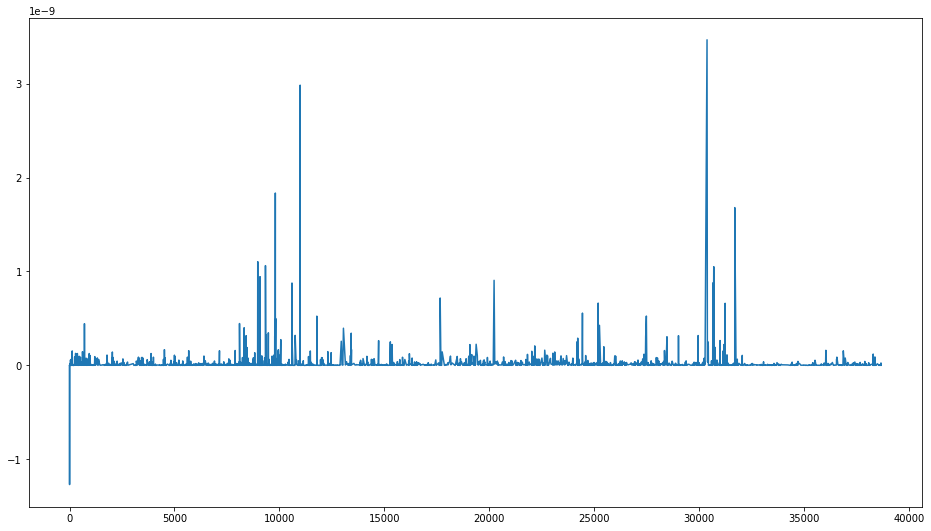

In [ ]:
plt.figure(figsize=(16, 9))
target_df = selected_df.copy()
filter_size = 0.001
target_column = 'L_error'
target_df = target_df[target_df[target_column] <= filter_size]

plt.plot(target_df.index, target_df[target_column])

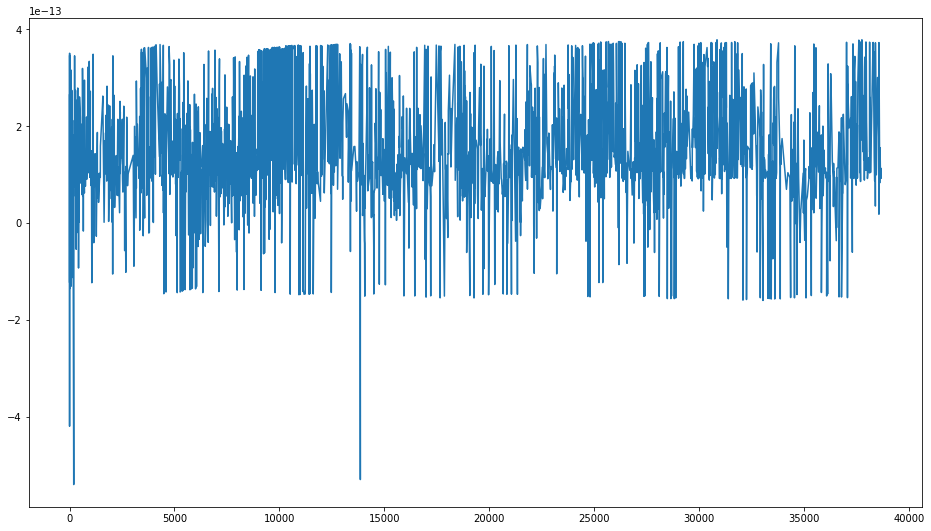

In [ ]:
plt.figure(figsize=(16, 9))
target_df = selected_df.copy()
filter_size = 0.001
target_column = 'L_error_sympy'
target_df = target_df[target_df[target_column] <= filter_size]

plt.plot(target_df.index, target_df[target_column])

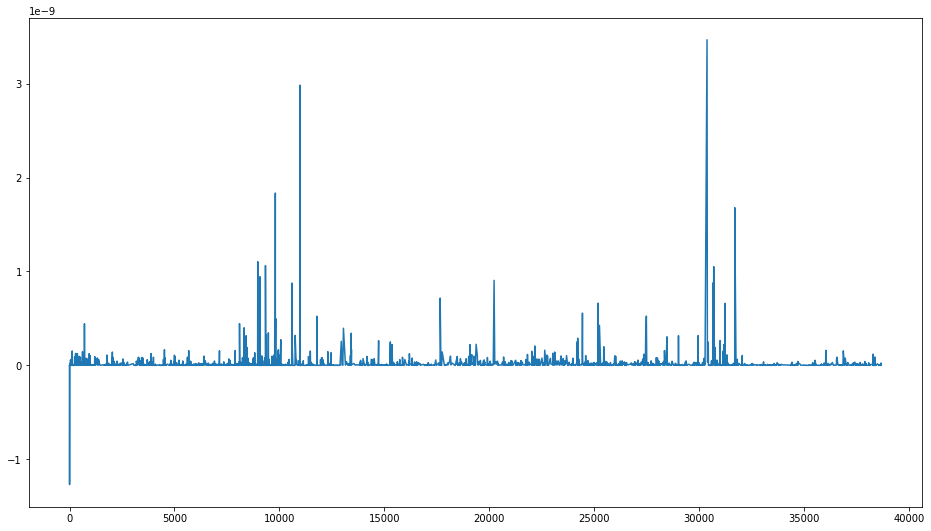

In [ ]:
plt.figure(figsize=(16, 9))
target_df = selected_df.copy()
filter_size = 0.001
target_column = 'L_error_compare'
target_df = target_df[target_df[target_column] <= filter_size]

plt.plot(target_df.index, target_df[target_column])

In [ ]:
swap_df = df[df['event_name']=='Swap']

In [ ]:
swap_df

,Unnamed: 0,timeStamp,blockNumber,transactionIndex,transactionHash,from,to,gasPrice,gasUsed,transactionCost,type,status,token0Address,token1Address,tickSpacing,feeTier,token0Decimal,token1Decimal,sender,owner,recipient,tickLower,tickUpper,amount0,amount1,liquidity,amount0_delta,amount1_delta,liquidity_delta,amount0_collected,amount1_collected,amount0_flashed,amount1_flashed,paid0,paid1,sqrtPriceX96,tick,event_name,dt,p_current,p_real,wealth,cum_wealth,cum_liquidity
4,4,2021-05-05 18:54:26,12375970,67,0xaa0ac68e65a36bcb875a8bd4f220f386e1a78e930267...,0x7521a523787Ed81722cf676A2574f2cEbCA7E68F,0x5593c595351E6ff2Ded9061967C7f65dA5309F4c,62640000000,830490,0.052022,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0x5593c595351E6ff2Ded9061967C7f65dA5309F4c,NaN,0x5593c595351E6ff2Ded9061967C7f65dA5309F4c,NaN,NaN,NaN,NaN,0,0.001511,-0.100120,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4295128740,-887272.0,Swap,NaN,-887271.999991,2.938957e-39,0.0,NaN,NaN
11,11,2021-05-05 23:12:52,12377177,137,0x3c573584dafcc293d2f7d16cef9c5d6d6407a44875b6...,0x2AF33E93f68b8497bb535C492F5867c7E83f2Bc4,0xE592427A0AEce92De3Edee1F18E0157C05861564,65100000000,647378,0.042144,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,0x2AF33E93f68b8497bb535C492F5867c7E83f2Bc4,NaN,NaN,NaN,NaN,104810393090398306271,-49.353975,0.600000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8999075733780372006218521175,-43507.0,Swap,15506.0,-43506.374116,1.290139e-02,0.0,NaN,NaN
13,13,2021-05-05 23:16:59,12377201,159,0xd8083607c3f6eb2ecdae4a1e8fa42b5d85b02c869c68...,0x7521a523787Ed81722cf676A2574f2cEbCA7E68F,0x5593c595351E6ff2Ded9061967C7f65dA5309F4c,58630000000,273745,0.016050,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0x5593c595351E6ff2Ded9061967C7f65dA5309F4c,NaN,0x5593c595351E6ff2Ded9061967C7f65dA5309F4c,NaN,NaN,NaN,NaN,192897889204364333807,-95.112214,1.303790,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9532961279012154937703450993,-42354.0,Swap,247.0,-42353.645965,1.447760e-02,0.0,NaN,NaN
14,14,2021-05-05 23:51:24,12377342,141,0xa1c83bf4587fe91e5432d12d851dcf64eac1bdf066c3...,0x51e8173b097C0DFb845929c09fBD1075Fe084103,0xE592427A0AEce92De3Edee1F18E0157C05861564,49000000000,116543,0.005711,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,NaN,192897889204364333807,3.000000,-0.043222,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9515208942888899399719700160,-42391.0,Swap,2065.0,-42390.926667,1.442373e-02,0.0,NaN,NaN
17,17,2021-05-06 00:06:55,12377409,258,0x52f8ee3db15701cea9f924f184f0bba630f33c3a42df...,0x13b0a6D14F9BEa59BEce705bFFe75c51f717241d,0xE592427A0AEce92De3Edee1F18E0157C05861564,54000000000,116601,0.006296,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,NaN,304249991527241509411,22.083184,-0.314830,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9433225671622059489746435093,-42565.0,Swap,931.0,-42564.002456,1.417625e-02,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38678,38678,2021-08-12 14:36:53,13010940,11,0x2e978b927cef259c263feabe18f47e345f887f7b188e...,0xe0ecfe775033F109482B3A1027dd59a99a0D1eA5,0x11111112542D85B3EF69AE05771c2dCCff4fAa26,92000000000,510562,0.046972,0x0,1,0x514910771AF9Ca656af840dff83E8264EcF986CA,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,60,3000,18,18,0xc176761d388CAf2F56Cf03329d82E1e7C48AE09c,NaN,0xc176761d388CAf2F56Cf03329d82E1e7C48AE09c,NaN,NaN,NaN,NaN,387212404922112972854343,4014.084126,-32.181483,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7101382267762962048823306494,